# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


data = pd.read_csv('dataframedummiesbase.csv')
data.isna().sum()

X = data.drop('mau', axis=1)
y = data['mau']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
print("Tudo Certo Até Agora'Eu Acho'")

Tudo Certo Até Agora'Eu Acho'


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

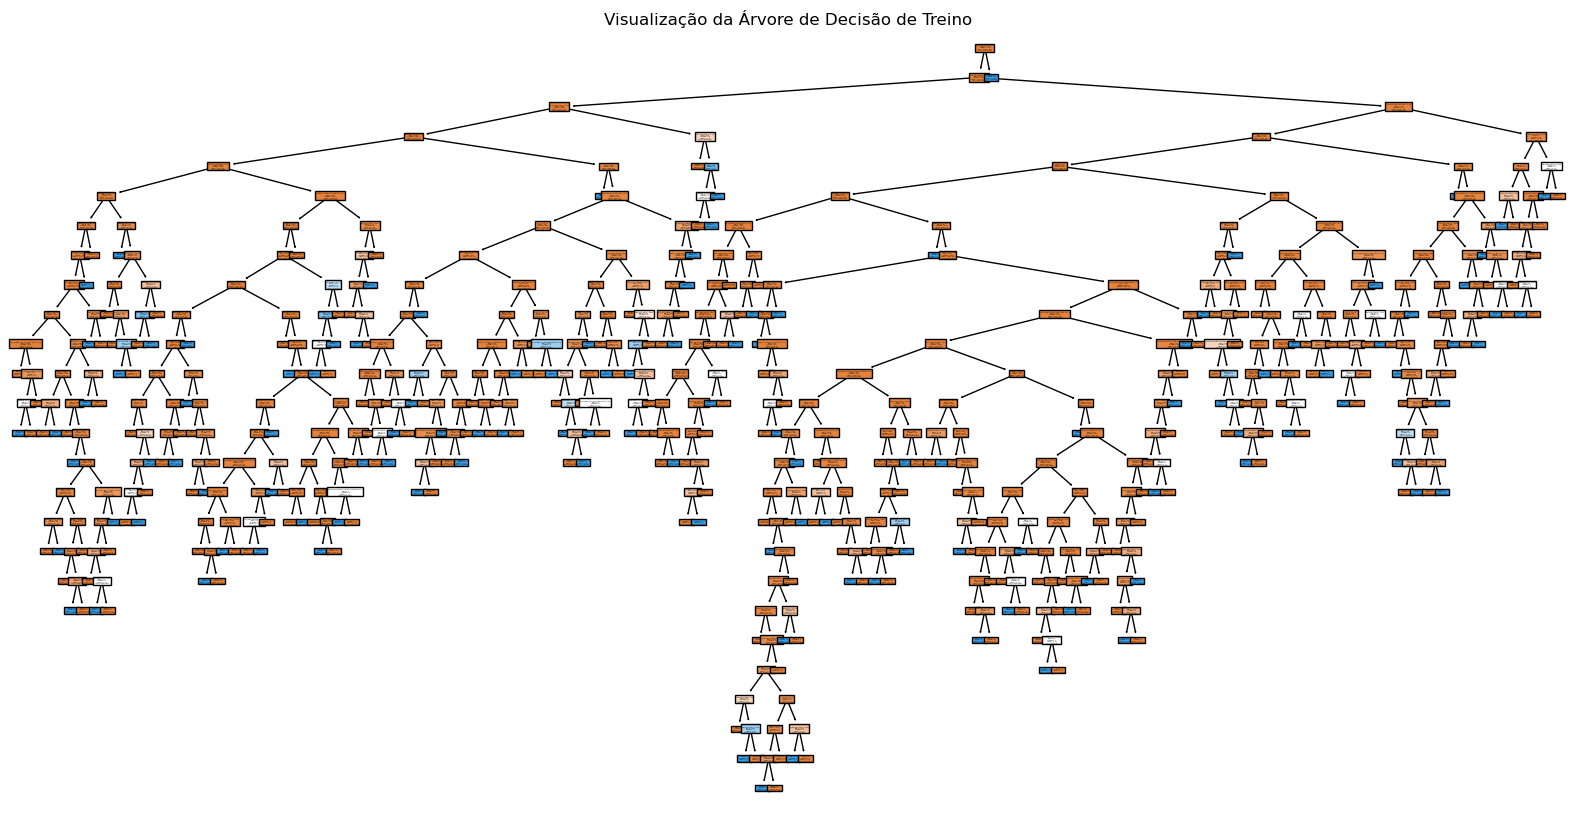

<Figure size 2000x1000 with 0 Axes>

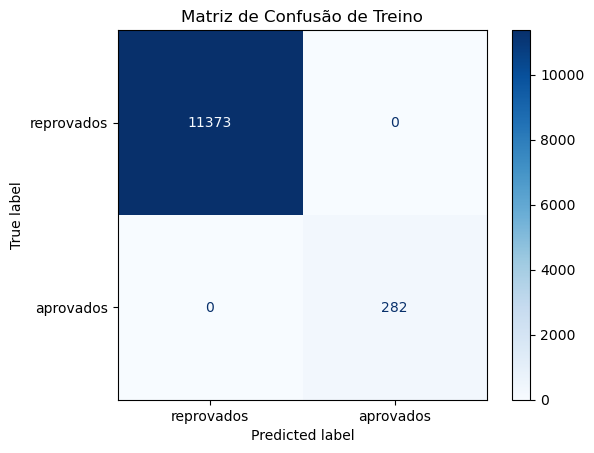

Acurácia na base de treinamento: 1.0


In [123]:
#2.1 e 2.2
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
#2.3
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          filled=True, 
          feature_names=X.columns, 
          class_names=["reprovados", "aprovados"])
plt.title('Visualização da Árvore de Decisão de Treino')
plt.show()

#2.4
plt.figure(figsize=(20, 10))
plot_confusion_matrix(clf, X_train, y_train, display_labels=["reprovados", "aprovados"], cmap='Blues', values_format='d')
plt.title('Matriz de Confusão de Treino')
plt.show()


#2.5

y_train_pred = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Acurácia na base de treinamento:", accuracy)


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Previsões para a base de teste: [0 0 0 ... 1 0 0]


<Figure size 2000x1000 with 0 Axes>

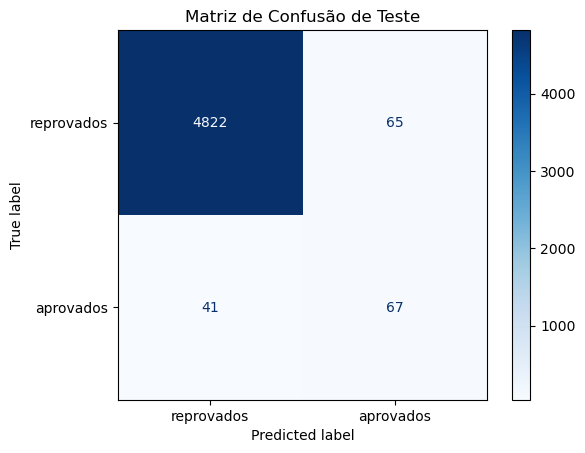

Acurácia na base de teste: 0.9787787787787787
Comparação da Acurácia - Treinamento vs. Teste:
Treinamento: 1.0 Teste: 0.9787787787787787
Proporção de proponentes classificados como 'Maus': 0.03


In [131]:
#3.1

y_test_pred = clf.predict(X_test)
print("Previsões para a base de teste:", y_test_pred)

#3.2

plt.figure(figsize=(20, 10))  
plot_confusion_matrix(clf, X_test, y_test, display_labels=["reprovados", "aprovados"], cmap='Blues', values_format='d')
plt.title('Matriz de Confusão de Teste')
plt.show()

#3.3

accuracy_test = accuracy_score(y_test, y_test_pred)
print("Acurácia na base de teste:", accuracy_test)
print("Comparação da Acurácia - Treinamento vs. Teste:")
print("Treinamento:", accuracy_train, "Teste:", accuracy_test)

#3.4

y_pred_test = clf.predict(X_test)

# Calcular a proporção de 'Maus'
unique, counts = np.unique(y_pred_test, return_counts=True)
predictions_count = dict(zip(unique, counts))
maus_count = predictions_count.get(1, 0)  # Assumindo que 'Maus' é representado por 1
total_predictions = len(y_pred_test)
proportion_maus = maus_count / total_predictions
print(f"Proporção de proponentes classificados como 'Maus': {proportion_maus:.2f}")

#3.5

y_bons = [0] * len(y_test)  
acuracia_bons = accuracy_score(y_test, y_bons)
